##### Analyzing Key Factors That Lead to Successful Startups
(An Exploratory Data Analysis)

The following is a project about understanding the key factors that lead to the success of startups, examining industry trends, key milestones, and the impact of funding.

Here are the main goals I had in mind when writing this:

- Outline the typical workflow of a data analysis project focusing on initial data exploration.

- Understanding some of the factors that contribute to a startup's success.

I really enjoyed analyzing this dataset and found that the more I explored it, the more questions emerged.

**Dataset**

 The dataset we are going to look today is from Kaggle site. 
 It contains intesting information about industries, funding, acquisition and investment information details of nearly a thousand startups going back to the 1980s and extending up to 2013. 
 
We will talk about some interesting factors that seem to have a strong correlation with a startup's success and analyzing these trends, and pose specific questions to guide our analysis in each area:

- **1. Are some industries more prone to startup acquisitions or closures? How important is the industry type?**

- **2. Does the number of milestones achieved impact a startup's chance of getting acquired?**

- **3. What is the average total funding for startups that successfully get acquired versus those that close?**

- **4. Do startups that receive funding in rounds A, B, or C have a better chance of succeeding than those that rely on angel investors or venture capital?**

#####  Step 1. Importing essential libraries for data analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_8179/2643158206.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook


In [3]:
notebook_directory = 'data'
file_name = 'startup.csv'
file_path = os.path.join('..', 'data', 'startup.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

##### Step 2. Initial Data Exploration

Our data analysis workflow begins with an initial data exploration.
In this phase, we create visualizations and analyze categorical variables to gain insights and identify patterns.

#### <span> 1. Are some industries more prone to startup acquisitions or closures? How important is the industry type?

Let’s first look at the average amount funded, total funding and the number of companies funded by industry and limit the results to the top 10.

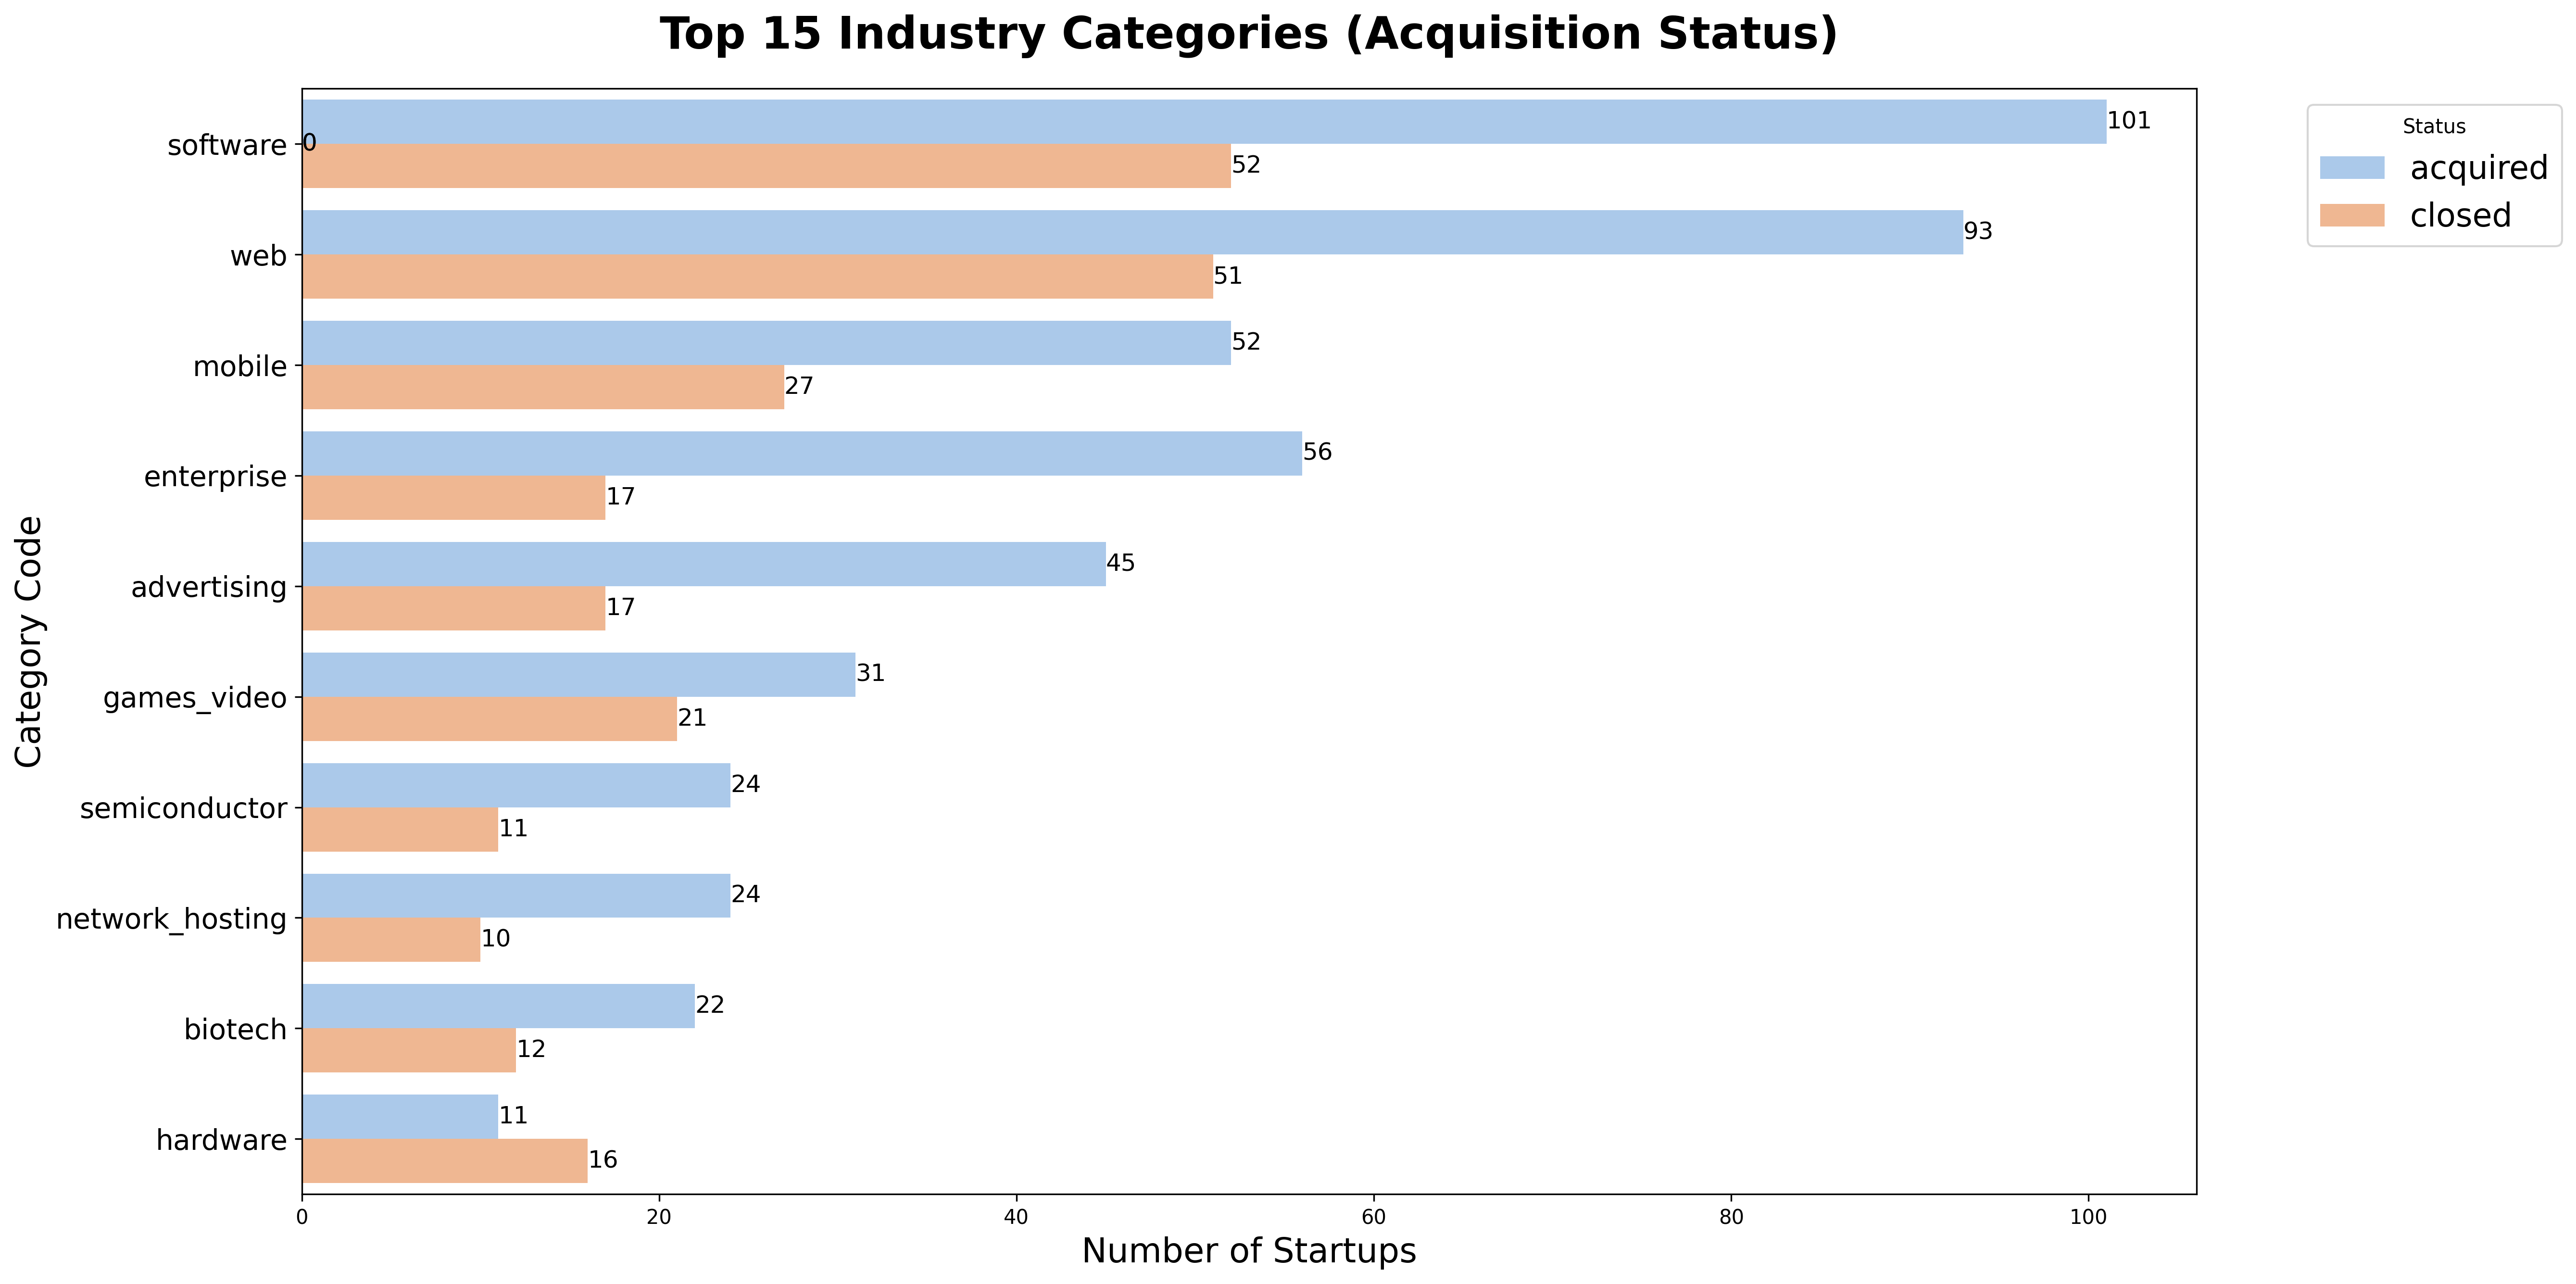

In [3]:
%matplotlib inline

# Getting the order of categories based on their frequency (now for y-axis since we are doing a horizontal bar plot)
order = data_df["category_code"].value_counts().index[:10]

# Create the countplot with horizontal bars
plt.figure(figsize=(18, 9), dpi=300)

# Specify the hue order explicitly
ax = sns.countplot(y="category_code", data=data_df, order=order, palette="pastel", hue='status', hue_order=['acquired', 'closed'])

plt.title("Top 15 Industry Categories (Acquisition Status)", fontsize=22,pad=20,fontweight='bold')
plt.xlabel("Number of Startups",fontsize=17)
plt.ylabel("Category Code", fontsize=17)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Set the font size of the category labels using tick_params
ax.tick_params(axis='y', labelsize=14) 

# Iterate through the patches (bars) and add text
for bar in ax.patches:
    # Get the position and width of the bar
    bar_y = bar.get_y() + bar.get_height() / 2  # Y-coordinate of the center of the bar
    bar_width = bar.get_width()  # Width of the bar (count value)

    # Add text to the right end of the bar
    ax.text(bar_width, bar_y, f'{int(bar_width)}', 
            fontsize=12, color='black', ha='left', va='center')

plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()


The software industry seems to have the highest number of startups, with a significant portion of them having been acquired. 

The web, mobile, and enterprise sectors also show a relatively large number of startups compared to other industries, with acquisitions in these categories as well.

The technology sector emerges as a key player in the startup arena, with its various branches experiencing different levels of success and investor interest. The data reinforces the notion that while the tech industry offers immense opportunities for startups, it also presents considerable risks, with the potential for both high rewards and high rates of failure. 

In [4]:
data_df['founded_at'] = pd.to_datetime(data_df['founded_at'])
data_df['founded_year'] = data_df['founded_at'].dt.strftime('%Y')

prop_df = data_df.groupby('founded_year').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

 #####  Number of startups with year

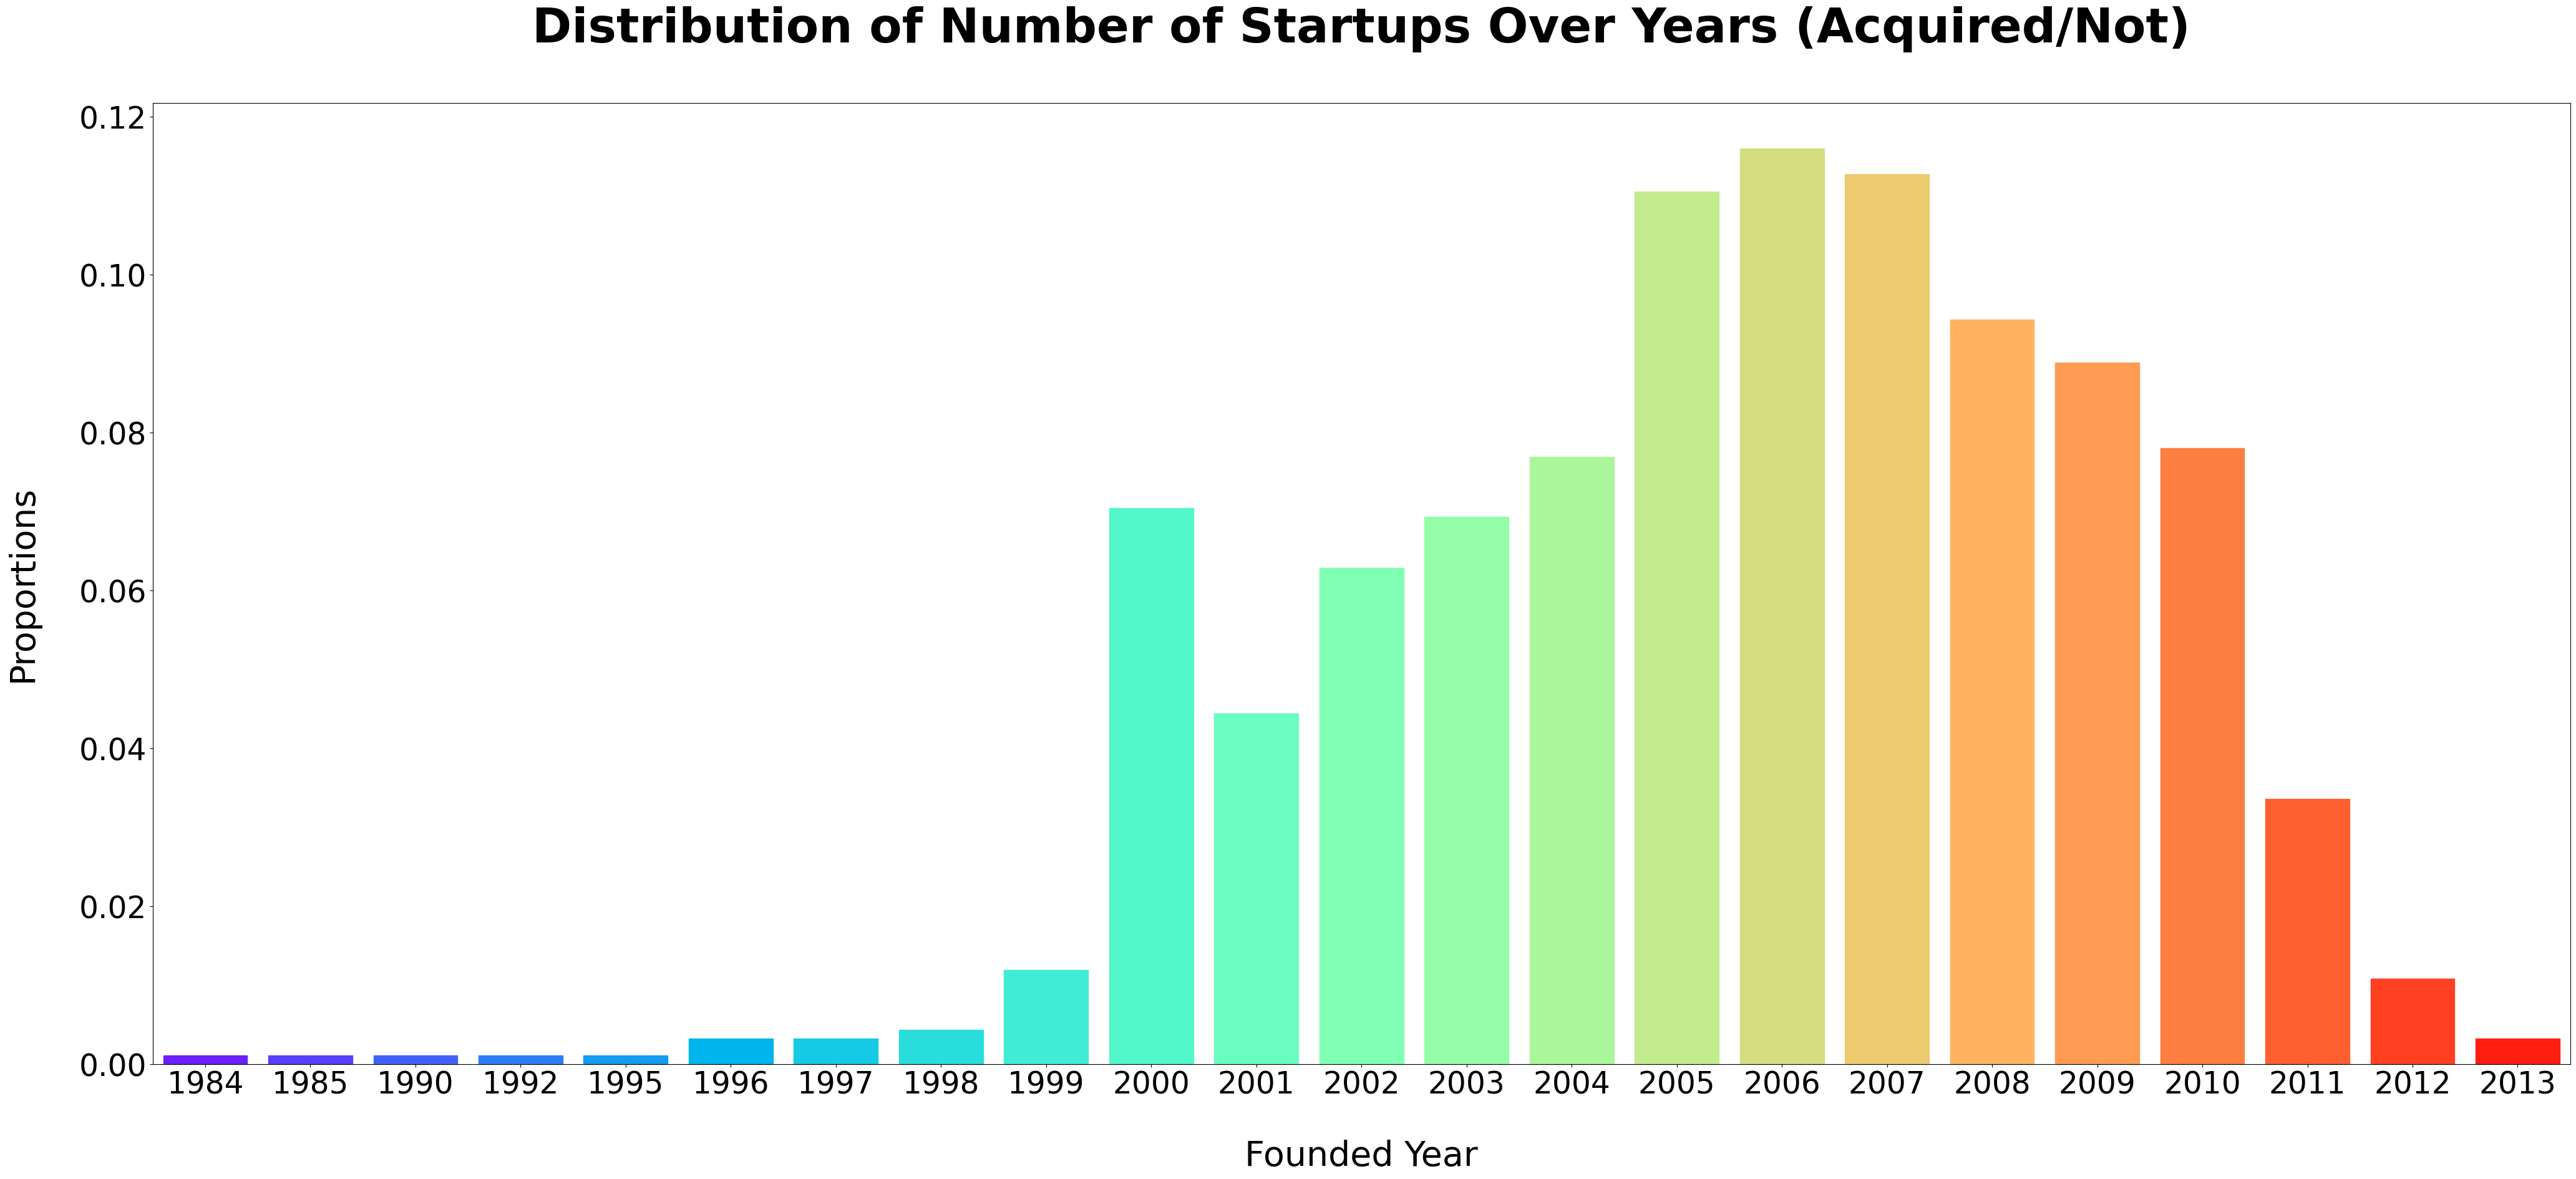

In [5]:
fig, ax = plt.subplots(figsize=(50, 20))

ax.tick_params(axis='x', labelsize=35)  # Adjust the font size as needed

# Optionally, change the font size of the tick labels on the y-axis as well
ax.tick_params(axis='y', labelsize=35) 

ax.set_xlabel('Founded Year', fontsize=40,labelpad=45)  # Change the font size as needed
ax.set_ylabel('Proportions', fontsize=40, labelpad=45)  
# Create a barplot without a hue parameter
barplot = sns.barplot(data=prop_df, x='founded_year', y='proportions')

# Manually set colors for each bar if you want them to be different
colors = sns.color_palette("rainbow", n_colors=len(prop_df['founded_year']))
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

plt.title('Distribution of Number of Startups Over Years (Acquired/Not)',fontsize=55, pad=70, fontweight='bold')
plt.show()


We observe a significant increase in the number of startups beginning in the early 2000s appear to have been an era of rapid growth for startups, with a peak in activity around 2007.

- This suggests a boom in startup creation during this period, possibly linked to the rise of the internet and digital technologies, which provided new opportunities for business ventures.

After 2007, there is a noticeable decline in the number of startups, which could be indicative of market saturation, economic downturns, or changes in investor behavior. 

- The decline becomes particularly steep after 2008, which aligns with the global financial crisis, an event known to have adversely affected business investment and growth.










 #####  Number of Acquired vs. Closed Startups in Top 10 States: 

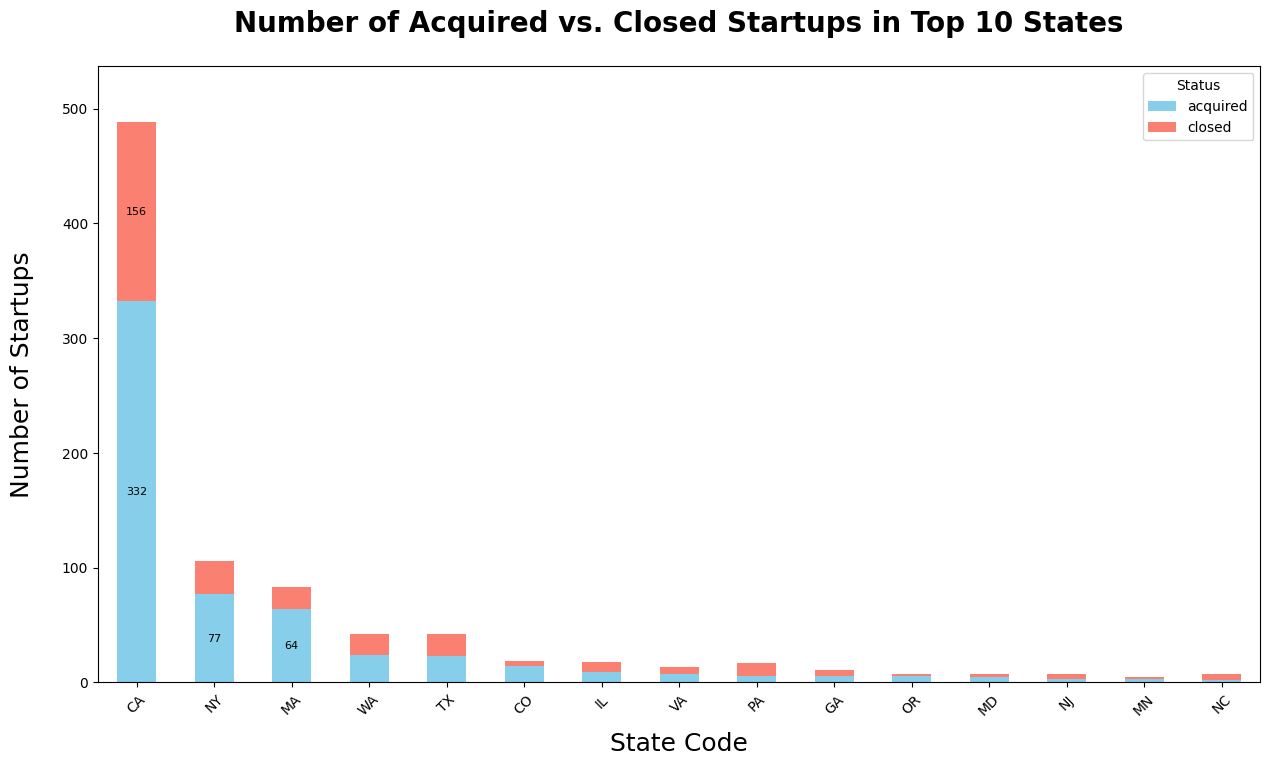

In [6]:
import matplotlib.pyplot as plt

# Assuming 'data_df' is your DataFrame and it contains 'state_code' and 'status' columns
grouped_data = data_df.groupby(['state_code', 'status']).size().unstack().fillna(0)

# Sort the DataFrame by the sum of 'acquired' and 'closed' for each state and take the first 10
grouped_data = grouped_data.sort_values(by=['acquired', 'closed'], ascending=False).head(15)

# Convert the index to string to ensure proper handling as categorical data
grouped_data.index = grouped_data.index.astype(str)

# Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'salmon'])
plt.title('Number of Acquired vs. Closed Startups in Top 10 States',fontsize=20, pad=25, fontweight='bold')
plt.xlabel('State Code', fontsize=18,labelpad=10)
plt.ylabel('Number of Startups', fontsize=18,labelpad=20)
plt.xticks(rotation=45)  # Rotates the state labels for better readability
plt.legend(title='Status')

# Define a threshold for displaying annotations
threshold = 50  # Adjust the threshold as needed

# Add text annotations
for i, (state_code, row) in enumerate(grouped_data.iterrows()):
    cumulative_height = 0
    for status in ['acquired', 'closed']:  # Iterate in a specific order
        count = row[status]
        # Display annotation only if count is above the threshold
        if count > threshold:
            # Position text at the center of each segment
            ax.text(i, cumulative_height + count / 2, f'{int(count):,}', 
                    fontsize=8, color='black', ha='center', va='center')
        cumulative_height += count

# Slightly adjust the ylim to make room for text annotations
ax.set_ylim(0, grouped_data.max().sum() * 1.1)  # Increase the y-axis limit
plt.show()

The bar chart presents the number of startups that have been either acquired or closed within the top 10 states.

- California (CA) stands out with the highest total number of startups, where the number of acquired startups is more than double the number closed. This suggests California's ecosystem is particularly conducive to startup growth and success.
- New York (NY) and Massachusetts (MA) follow, with more startups being acquired than closed, which indicates a healthy environment for startups in these states as well.

In other states such as Washington (WA), Texas (TX), and Colorado (CO), the numbers of acquisitions and closures are closer, pointing to a more challenging environment.
The remaining states on the chart show a relatively low number of startups and a closer balance between acquisitions and closures.

##### <span style="color: #add8e6;"> 2. Cleaning the data 

In [7]:
# Assuming you have a DataFrame called 'data'
count = data_df['status'].value_counts()
# Print the count with labels
print(f'Acquired: {count[1]}, Closed: {count[0]}')

Acquired: 326, Closed: 597


/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_8179/2792090454.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Acquired: {count[1]}, Closed: {count[0]}')


In [8]:
data_df['status'] = data_df.status.map({'acquired':1, 'closed':0})
data_df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,0,1,0,0,0,0,1.0000,0,1,2007
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,1,0,0,1,1,1,4.7500,1,1,2000
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,1,0,0,0,4.0000,1,1,2009
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,0,1,1,1,3.3333,1,1,2002
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,1,1,0,0,0,0,1.0000,1,0,2010
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,0,0,0,1,0,0,3.0000,1,0,2002
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,1,0,1,1,0,0,1.6667,1,1,2005
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,0,0,1,1,0,1,3.5000,1,1,2004
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,1,0,1,0,0,1,4.0000,1,1,2002
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,1,1,1,0,0,0,1.0000,1,1,2005


**Drop the irrelevant features from 48 columns**

In [9]:
data_df = data_df.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
data_df

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,San Diego,2007-01-01,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,2007
1,CA,Los Gatos,2000-01-01,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,2000
2,CA,San Diego,2009-03-18,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,2009
3,CA,Cupertino,2002-01-01,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,2002
4,CA,San Francisco,2010-08-01,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,2009-01-01,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,...,0,0,1,0,0,0,6.0000,1,1,2009
919,MA,Burlington,1998-01-01,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,...,1,0,0,1,0,0,2.6667,1,0,1998
920,CA,Sunnyvale,1999-01-01,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,...,0,0,0,0,0,1,8.0000,1,0,1999
921,CA,San Francisco,2009-01-01,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,...,0,0,1,1,0,0,1.0000,1,1,2009


In [10]:
num_columns = len(data_df.columns)
print(f"After dropping irrelevant features The DataFrame has {num_columns} columns.")

After dropping irrelevant features The DataFrame has 25 columns.


 ##### <span style="color: #add8e6;"> Looking for missing values 

In [11]:
x= data_df.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
status                        0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
founded_year                  0
dtype: int64

- "closed_at"

"In our dataset, we treat missing 'closed_at' dates as an indicator that the startup was still operating at the time the data was collected, marking these as 'x'. To aid our binary classification, we then convert the 'closed_at' column: 'x' signifies ongoing operations (marked as 0), while any other value indicates closure (marked as 1). This approach helps us analyze startups based on their operational status."

In [12]:
print(f'Earliest startup founding date: {data_df.founded_at.min()}')
print(f'Latest startup founding date: {data_df.founded_at.max()}')

Earliest startup founding date: 1984-01-01 00:00:00
Latest startup founding date: 2013-04-16 00:00:00


- "age_first_milestone_year" 
- "age_last_milestone_year"

In [13]:
data_df["age_first_milestone_year"].fillna((data_df["age_first_milestone_year"].mean()), inplace=True)
data_df["age_last_milestone_year"].fillna((data_df["age_last_milestone_year"].mean()), inplace=True)

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_8179/3876069876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df["age_first_milestone_year"].fillna((data_df["age_first_milestone_year"].mean()), inplace=True)
/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_8179/3876069876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [14]:
data= data_df.isnull().sum()
data.sort_values(ascending=False)

closed_at                   588
state_code                    0
milestones                    0
status                        0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
category_code                 0
funding_total_usd             0
city                          0
funding_rounds                0
relationships                 0
age_last_milestone_year       0
age_first_milestone_year      0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
founded_year                  0
dtype: int64

**General Changes:*

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
- Handling Missing Values in 'closed_at': Missing values in 'closed_at' represent startups that are still open and will not be filled. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date.

##### <span style="color: #add8e6;"> Handle Negative values 

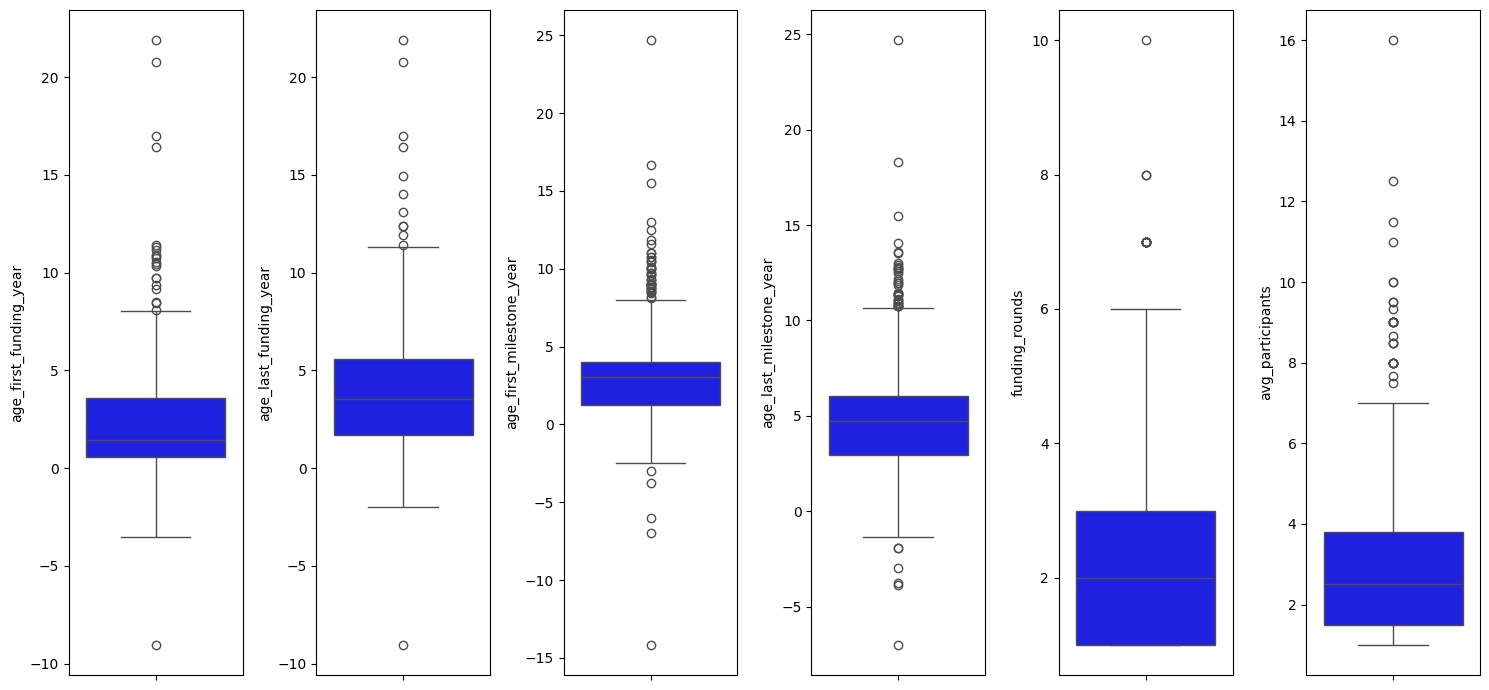

In [15]:
# To find how much there are outliers in dataset, we should use only continuous variables and the ones that are relevant for our analysis, because rest of numerical variables are binary variables including 0 and 1

featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_rounds','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=data_df[featuresNumfinal[i]], color='blue', orient='v')
    plt.tight_layout()

In [16]:
data_df.founded_at=pd.to_datetime(data_df.founded_at)
data_df.first_funding_at=pd.to_datetime(data_df.first_funding_at)
data_df.last_funding_at=pd.to_datetime(data_df.last_funding_at)

data_df.head(3)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,San Diego,2007-01-01,NaN,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.00,0,1,2007
1,CA,Los Gatos,2000-01-01,NaN,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.75,1,1,2000
2,CA,San Diego,2009-03-18,NaN,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.00,1,1,2009


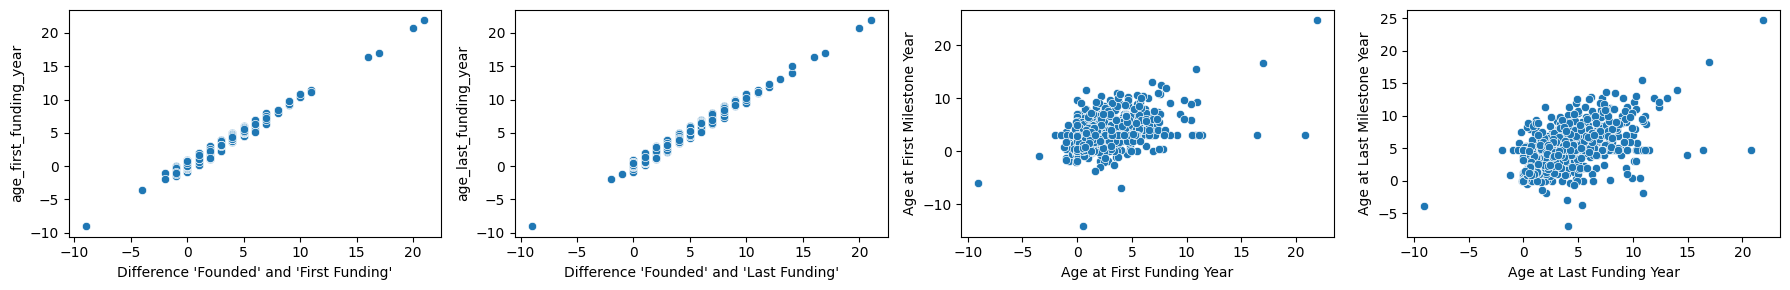

In [17]:
# What does it mean "age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year" , let's together analyze it

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_df' is a pandas DataFrame with the necessary columns and datetime information

plt.figure(figsize=(18, 3), dpi=100)

# First subplot
plt.subplot(1, 4, 1)
sns.scatterplot(x=data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year, 
                y=data_df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

# Second subplot
plt.subplot(1, 4, 2)
sns.scatterplot(x=data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year, 
                y=data_df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'")

# Third subplot
plt.subplot(1, 4, 3)
sns.scatterplot(x=data_df["age_first_funding_year"], 
                y=data_df["age_first_milestone_year"])
plt.xlabel("Age at First Funding Year")
plt.ylabel("Age at First Milestone Year")

# Fourth subplot
plt.subplot(1, 4, 4)
sns.scatterplot(x=data_df["age_last_funding_year"], 
                y=data_df["age_last_milestone_year"])
plt.xlabel("Age at Last Funding Year")
plt.ylabel("Age at Last Milestone Year")

plt.tight_layout()  # Adjust the layout
plt.show()


# As we see the graph, we can say high correlation between funding date and age funding. Difference between "last_funding_at" and "founded_at" is related "age_last_funding_year".
# "age_first_funding_year" and "age_last_funding_year" have negative values,it shouldn't be and also it can not be that "founded" date higher than "first_funding_at" and "last_funding_at"
# So we must get the absolute value of columns including negative value

In [18]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(data_df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [19]:
# we must get the absolute value of columns including negative value
data_df["age_first_funding_year"]=np.abs(data_df["age_first_funding_year"])
data_df["age_last_funding_year"]=np.abs(data_df["age_last_funding_year"])
data_df["age_first_milestone_year"]=np.abs(data_df["age_first_milestone_year"])
data_df["age_last_milestone_year"]=np.abs(data_df["age_last_milestone_year"])

In [20]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(data_df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


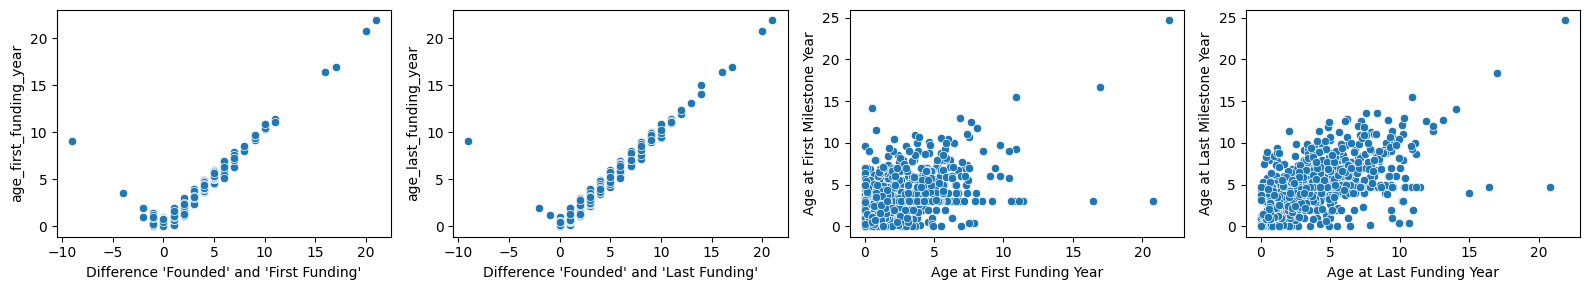

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_df' is a pandas DataFrame with the necessary datetime columns and data

plt.figure(figsize=(16, 3), dpi=100)

# First subplot
plt.subplot(1, 4, 1)
sns.scatterplot(x=(data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year), 
                y=data_df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

# Second subplot
plt.subplot(1, 4, 2)
sns.scatterplot(x=(data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year), 
                y=data_df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'")

# Third subplot
plt.subplot(1, 4, 3)
sns.scatterplot(x=data_df["age_first_funding_year"], 
                y=data_df["age_first_milestone_year"])
plt.xlabel("Age at First Funding Year")
plt.ylabel("Age at First Milestone Year")

# Fourth subplot
plt.subplot(1, 4, 4)
sns.scatterplot(x=data_df["age_last_funding_year"], 
                y=data_df["age_last_milestone_year"])
plt.xlabel("Age at Last Funding Year")
plt.ylabel("Age at Last Milestone Year")

plt.tight_layout()  # Adjust the layout
plt.show()

##### <span style="color: #add8e6;"> Handle Outliers

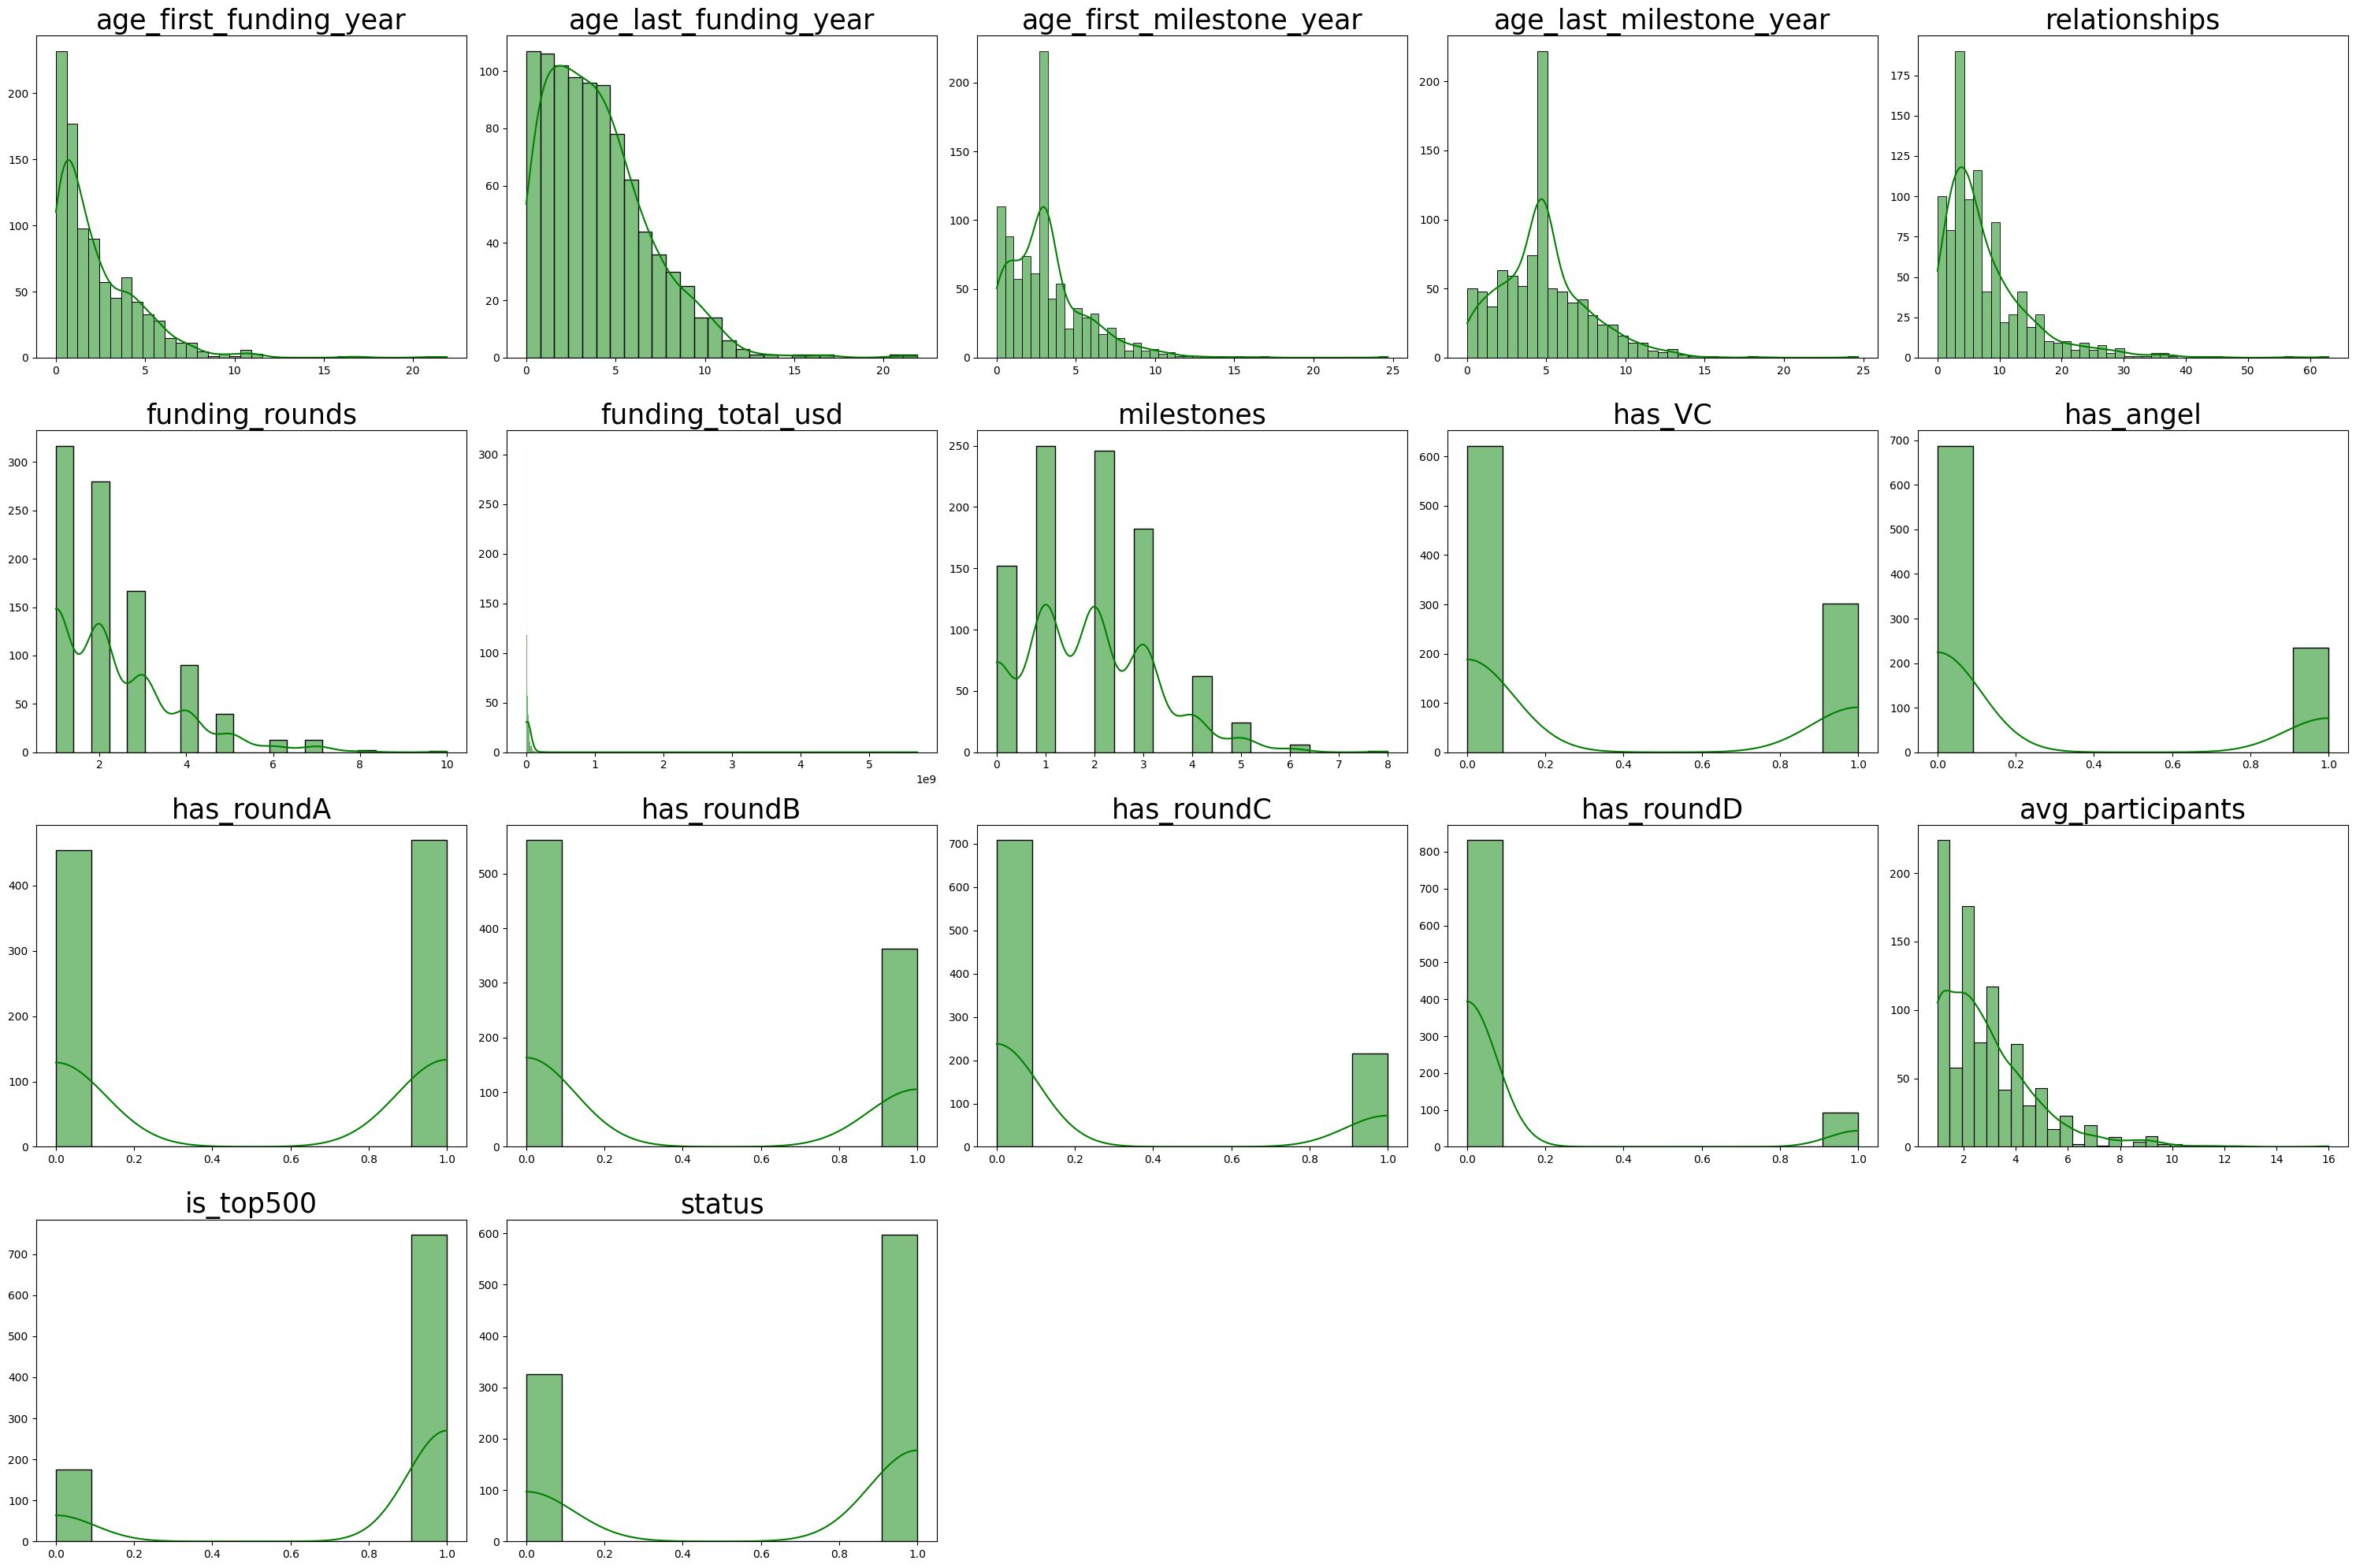

In [22]:
# Select only numeric columns for histogram plots
numeric_columns = data_df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplots
num_variables = len(numeric_columns)
num_columns = 5  # You can choose how many columns you want per row
num_rows = int(np.ceil(num_variables / num_columns))

# Set the overall figure size to give each subplot a little more room
fig_width = num_columns * 6  # 5 inches per subplot column
fig_height = num_rows * 5    # 4 inches per subplot row

plt.figure(figsize=(fig_width, fig_height))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(column, fontsize=25)
    sns.histplot(data_df[column], color="green", kde=True)  # Adding KDE for smooth distribution curve.
    plt.xlabel('')  # Remove x labels to prevent clutter
    plt.ylabel('')  # Remove y labels to prevent clutter

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import zscore

zscores=zscore(data_df["age_first_funding_year"])

for threshold in range(1,8,1):
    print("Threshold value: {}". format(threshold))
    print("Number of outliers: {}".format(len(np.where(zscores>threshold)[0])))
    print("------------------------")

Threshold value: 1
Number of outliers: 128
------------------------
Threshold value: 2
Number of outliers: 36
------------------------
Threshold value: 3
Number of outliers: 15
------------------------
Threshold value: 4
Number of outliers: 4
------------------------
Threshold value: 5
Number of outliers: 4
------------------------
Threshold value: 6
Number of outliers: 3
------------------------
Threshold value: 7
Number of outliers: 2
------------------------


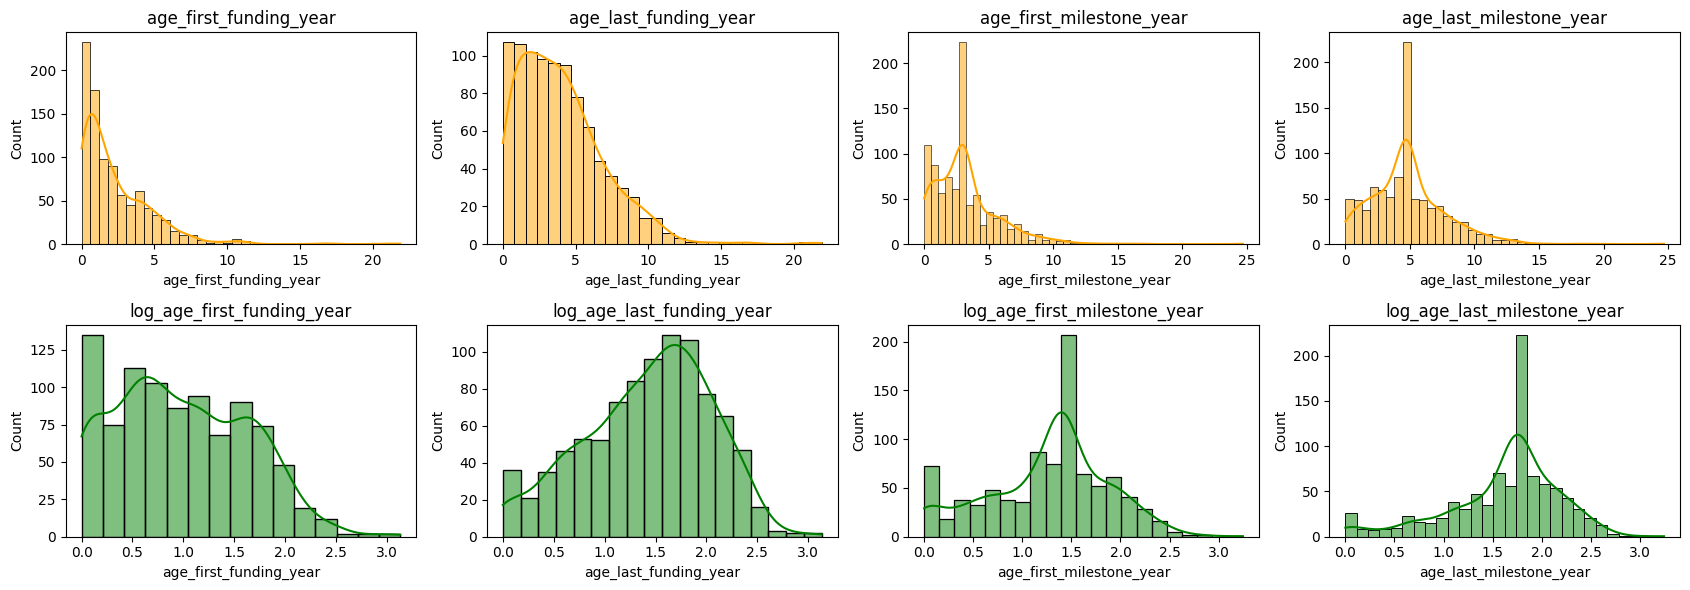

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

variables = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]

# Create a figure with a specific size
plt.figure(figsize=(17, 6), dpi=100)

# Loop through the list of variables
for i, variable in enumerate(variables):
    # Regular histogram
    plt.subplot(2, 4, i + 1)
    sns.histplot(data_df[variable], color="orange", kde=True)
    plt.title(variable)

    # Log-transformed histogram
    plt.subplot(2, 4, i + 5)
    log_variable = np.log(data_df[variable] + 1)  # Adding 1 to avoid log(0)
    sns.histplot(log_variable, color="green", kde=True)
    plt.title(f"log_{variable}")

plt.tight_layout()
plt.show()

##### <span style="color: #add8e6;"> 3. Data Transformation

In [25]:
print(data_df.dtypes)

state_code                          object
city                                object
founded_at                  datetime64[ns]
closed_at                           object
first_funding_at            datetime64[ns]
last_funding_at             datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
category_code                       object
has_VC                               int64
has_angel                            int64
has_roundA                           int64
has_roundB                           int64
has_roundC                           int64
has_roundD                           int64
avg_participants                   float64
is_top500                            int64
status     

BEFORE

In [26]:
data_df.sort_index().head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,San Diego,2007-01-01,NaN,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,2007
1,CA,Los Gatos,2000-01-01,NaN,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,2000
2,CA,San Diego,2009-03-18,NaN,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,2009
3,CA,Cupertino,2002-01-01,NaN,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,2002
4,CA,San Francisco,2010-08-01,10/1/2012,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,2010
5,CA,Mountain View,2002-01-01,2/15/2009,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,0,1,0,0,3.0000,1,0,2002
6,CA,Mountain View,2005-01-01,NaN,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,1,0,1,1,0,0,1.6667,1,1,2005
7,CA,San Rafael,2004-01-01,NaN,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,0,1,1,0,1,3.5000,1,1,2004
8,MA,Williamstown,2002-01-01,NaN,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,1,0,1,0,0,1,4.0000,1,1,2002
9,CA,Palo Alto,2005-06-01,NaN,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,1,0,0,0,1.0000,1,1,2005


In [27]:
# Sort DataFrame by 'closed_at' in descending order
data_df = data_df.sort_values(by='closed_at', ascending=False )
# Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]
print("Last startup closing date:", last_closed_date)

Last startup closing date: 9/8/2013


In [28]:
# Assuming your_data_df is your main DataFrame
data_df = data_df

data_df['closed_at'] = pd.to_datetime(data_df['closed_at'], errors='coerce')

# Sort DataFrame by 'closed_at' in descending order
data_df = data_df.sort_values(by='closed_at', ascending=False )

# Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]
print("Last startup closing date:", last_closed_date)

# Create a temporary variable 'closed_temp' with the non-null values of 'closed_at'
closed_temp = data_df['closed_at'].copy()

# Fill the null values in 'closed_temp' with the last closed date
closed_temp.fillna(last_closed_date, inplace=True)

# Calculate the relative age based on 'founded_at' and 'closed_temp'
data_df['age'] = ((closed_temp - data_df['founded_at']).dt.days / 365.25).round(4)

# Replace missing values in the original 'closed_at' 
#By filling the NaNs (which represent startups that are still open) with a placeholder value (like "x"),
#and then converting that placeholder to 1, you are effectively creating a binary variable where 1 indicates a startup is still operating.
#By setting known closed_at values (which represent startups that have closed) to 0, you're indicating that these startups are not operating anymore.

data_df['closed_at'] = data_df['closed_at'].fillna(value="x")
data_df['closed_at'] = data_df.closed_at.apply(lambda x: 1 if x =='x' else 0)

Last startup closing date: 2013-10-30 00:00:00


To calculate age We fill column last_date with 2013-10-30 with assumption that is the last number of dataset

In [29]:
data_df.sort_index().head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year,age
0,CA,San Diego,2007-01-01,1,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,1,0,0,0,0,1.0000,0,1,2007,6.8282
1,CA,Los Gatos,2000-01-01,1,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,0,0,1,1,1,4.7500,1,1,2000,13.8289
2,CA,San Diego,2009-03-18,1,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,1,0,0,0,4.0000,1,1,2009,4.6188
3,CA,Cupertino,2002-01-01,1,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,1,1,1,3.3333,1,1,2002,11.8275
4,CA,San Francisco,2010-08-01,0,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,0,0,0,0,1.0000,1,0,2010,2.1684
5,CA,Mountain View,2002-01-01,0,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,1,0,0,3.0000,1,0,2002,7.1239
6,CA,Mountain View,2005-01-01,1,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,0,1,1,0,0,1.6667,1,1,2005,8.8268
7,CA,San Rafael,2004-01-01,1,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,1,1,0,1,3.5000,1,1,2004,9.8289
8,MA,Williamstown,2002-01-01,1,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,0,1,0,0,1,4.0000,1,1,2002,11.8275
9,CA,Palo Alto,2005-06-01,1,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,0,0,0,1.0000,1,1,2005,8.4134


Converting categorical to Numerical values
- Following variables : 'state_code', 'city', 'category_code'

In [30]:
# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code']

# Dictionary to store mappings
column_mappings = {}

# Create a function to generate mappings
def create_mapping(column):
    unique_values = data_df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    data_df[column] = data_df[column].map(mapping)
    # Save mapping in the dictionary
    column_mappings[column] = mapping

# Now, column_mappings contains the desired dictionary structure
print(column_mappings)

{'state_code': {'CA': 0, 'NY': 1, 'IL': 2, 'MI': 3, 'NJ': 4, 'OH': 5, 'CT': 6, 'DC': 7, 'WA': 8, 'PA': 9, 'TX': 10, 'ID': 11, 'ME': 12, 'MA': 13, 'TN': 14, 'VA': 15, 'NC': 16, 'MN': 17, 'GA': 18, 'CO': 19, 'FL': 20, 'MD': 21, 'WI': 22, 'AR': 23, 'IN': 24, 'UT': 25, 'AZ': 26, 'KY': 27, 'NM': 28, 'NH': 29, 'RI': 30, 'OR': 31, 'NV': 32, 'MO': 33, 'WV': 34}, 'city': {'Mountain View': 0, 'San Diego': 1, 'New York': 2, 'San Francisco': 3, 'Chicago': 4, 'Bingham Farms': 5, 'Hillsborough': 6, 'Cincinnati': 7, 'Yorba Linda': 8, 'Westport': 9, 'Washington': 10, 'Seattle': 11, 'Philadelphia': 12, 'San Jose': 13, 'Fremont': 14, 'Evanston': 15, 'Austin': 16, 'Beverly Hills': 17, 'Idaho Falls': 18, 'South San Francisco': 19, 'Pittsburgh': 20, 'West Newfield': 21, 'NY': 22, 'Burlington': 23, 'Red Bank': 24, 'Palo Alto': 25, 'Memphis': 26, 'Champaign': 27, 'San Mateo': 28, 'Waltham': 29, 'Viena': 30, 'NYC': 31, 'Canton': 32, 'Cambridge': 33, 'Andover': 34, 'Raleigh': 35, 'Oakland': 36, 'Saint Paul': 3

In [31]:
data_df.sort_index().head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year,age
0,0,1,2007-01-01,1,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,1,0,0,0,0,1.0000,0,1,2007,6.8282
1,0,62,2000-01-01,1,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,0,0,1,1,1,4.7500,1,1,2000,13.8289
2,0,1,2009-03-18,1,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,1,0,0,0,4.0000,1,1,2009,4.6188
3,0,145,2002-01-01,1,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,1,1,1,3.3333,1,1,2002,11.8275
4,0,3,2010-08-01,0,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,0,0,0,0,1.0000,1,0,2010,2.1684
5,0,0,2002-01-01,0,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,1,0,0,3.0000,1,0,2002,7.1239
6,0,0,2005-01-01,1,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,0,1,1,0,0,1.6667,1,1,2005,8.8268
7,0,146,2004-01-01,1,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,1,1,0,1,3.5000,1,1,2004,9.8289
8,13,147,2002-01-01,1,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,0,1,0,0,1,4.0000,1,1,2002,11.8275
9,0,25,2005-06-01,1,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,0,0,0,1.0000,1,1,2005,8.4134


In [32]:
numerical_features = data_df.select_dtypes(include=['number']).columns.tolist()
categorical_features = data_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = data_df.select_dtypes(include=['datetime']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['is_acquired']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nDatetime Features ({0}):".format(len(datetime_features)))
print(datetime_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (22):
['state_code', 'city', 'closed_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status', 'age']

Categorical Features (1):
['founded_year']

Datetime Features (3):
['founded_at', 'first_funding_at', 'last_funding_at']

Target Variable (1):
['is_acquired']


In [33]:
# #I dont need them because i already used them to calculate age (Avoid Multicollinearity)
# # Assuming 'data_df' is your DataFrame
# data_df = data_df.drop(['founded_at', 'closed_at'], axis=1)

##### <span style="color: #add8e6;"> Correlation between variables and startup success

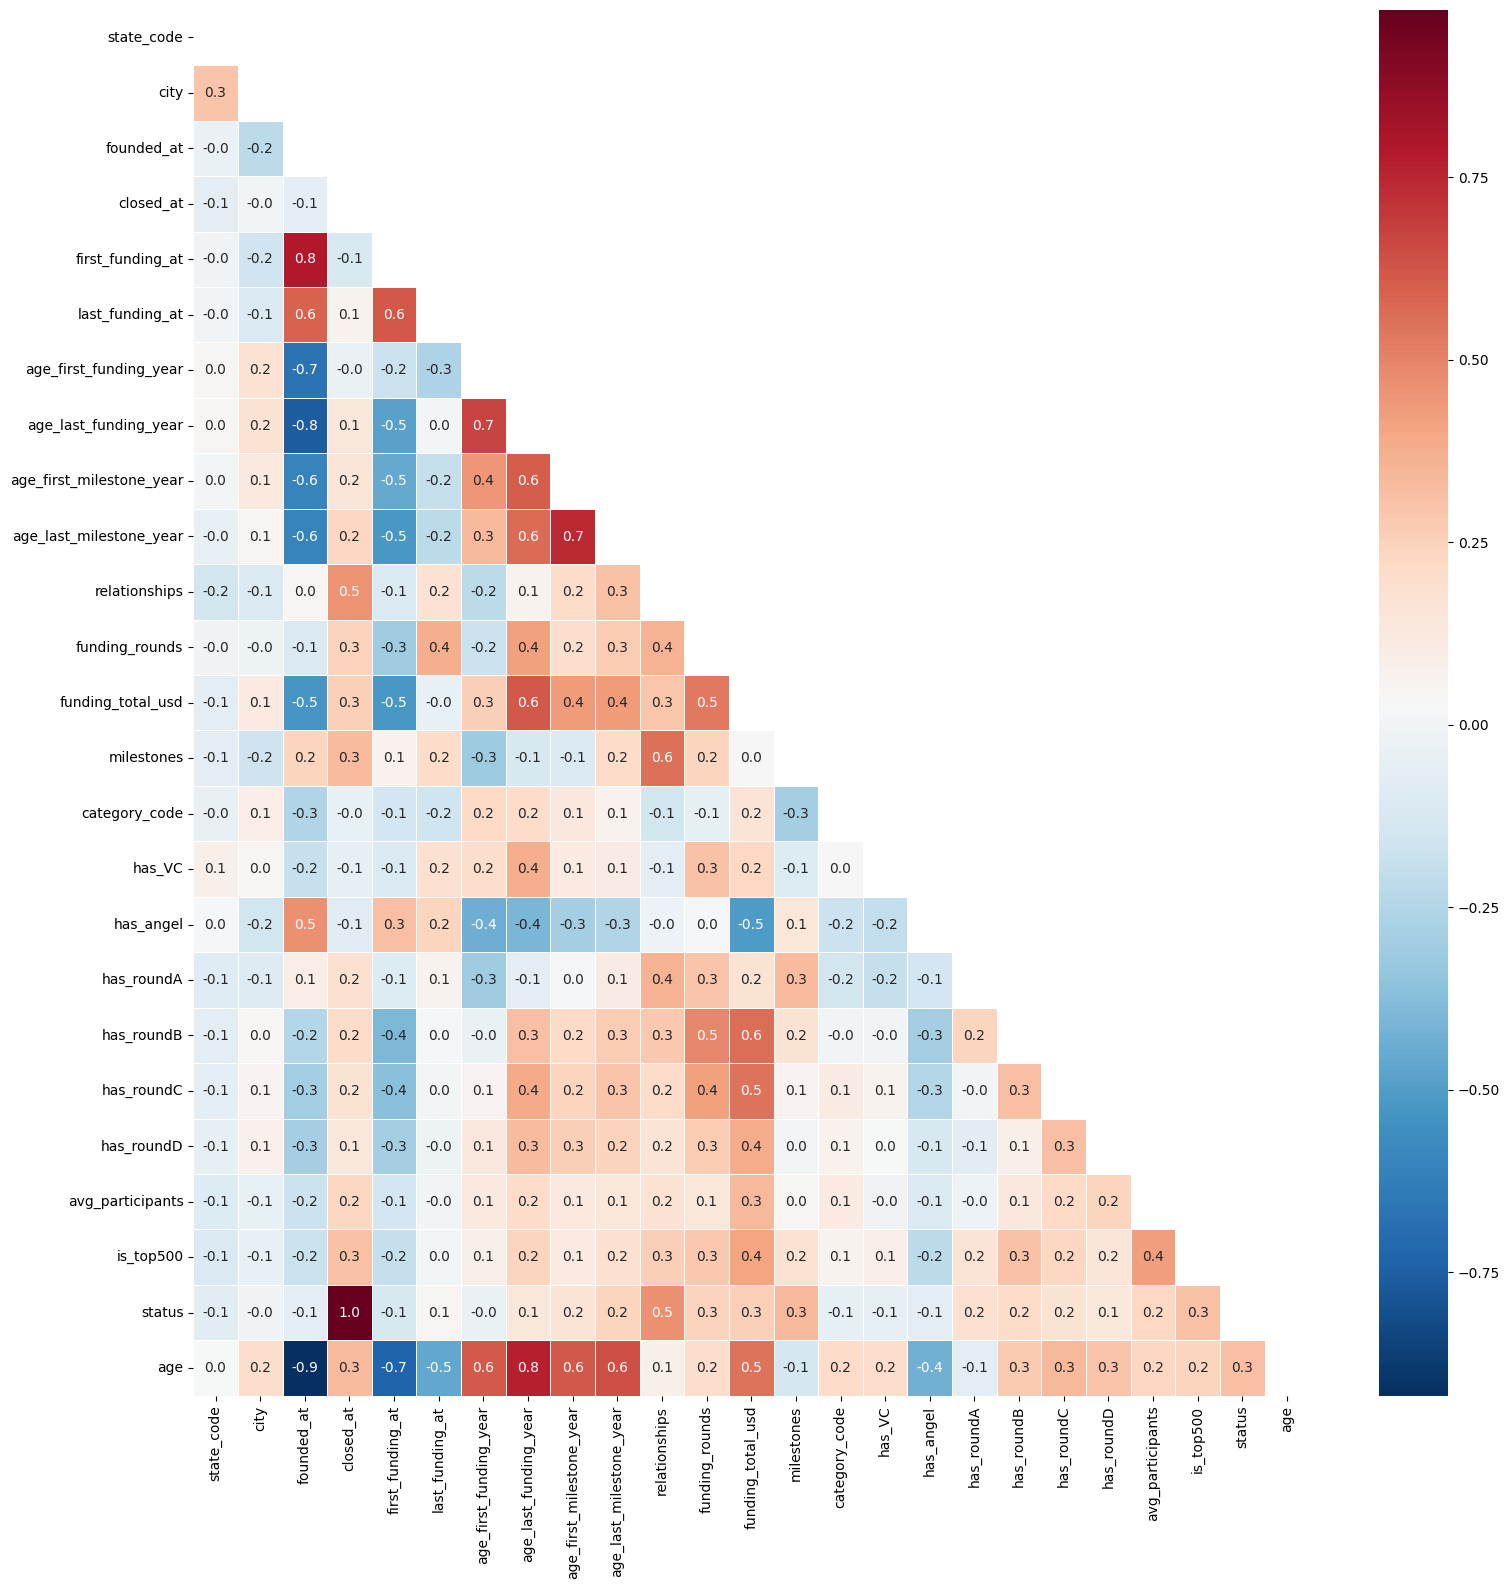

In [34]:
def draw_heatmap(data_df):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = data_df.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','datetime']
numerical_df_1 = data_df.select_dtypes(numerics)

draw_heatmap(numerical_df_1)

- Relationships (0.5):

A moderate positive correlation indicates that companies with more relationships tend to align positively with the target. This suggests the importance of networking and connections.
Assumption: Strong networks could offer better resource access, benefiting the target outcome.
- Age Last Milestone Year (0.4):

Companies achieving milestones later in their lifecycle show a moderate correlation with the target, hinting at the value of sustained growth and long-term strategies.
Assumption: Maturity and persistence might be key factors influencing the target.
- Age First Milestone Year (0.4):

Early achievement of milestones correlates moderately with the target, indicating early success or potential as significant.
Assumption: Early milestones could reflect innovation or effective initial strategies.
- Founding Rounds (0.3):

A slight positive correlation suggests that more funding rounds might slightly influence the target, possibly indicating investor confidence or market validation.
Assumption: Repeated funding could signal a company's resilience and growth potential.
- Funding Total USD (0.3):

The total funding amount has a weak positive relationship with the target, suggesting that higher funding can be beneficial but is not a decisive factor.
Assumption: While important, funding alone is not the sole determinant of the target outcome.


In our analysis, we noted significant correlations between features such as first_funding_at and founded_at. Given the robustness of the Random Forest model against multicollinearity, these correlations present less concern for our analysis. While acknowledging these correlations for comprehensive data understanding, we retain these features in our model. This approach leverages Random Forest's strengths while ensuring a nuanced interpretation of our dataset.


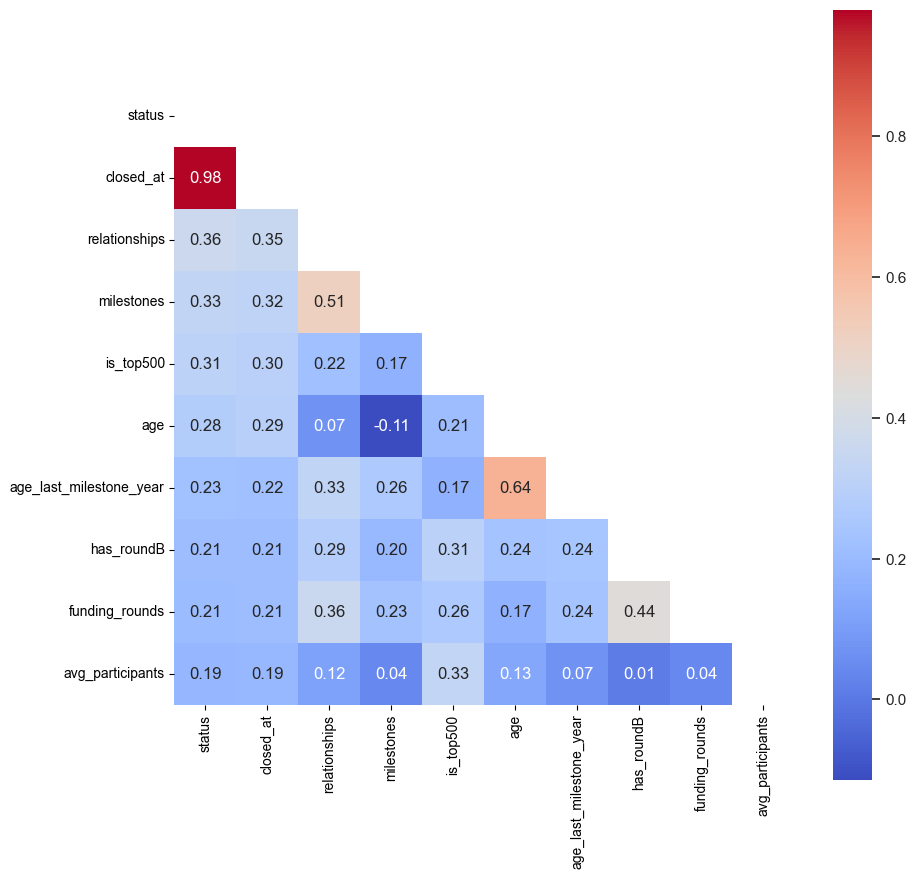

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_df' is your existing DataFrame and 'is_acquired' is your target variable

# Select all columns, including datetime
cols = data_df.columns

# Calculate the correlation of the numerical features with the target variable
numeric_cols = data_df.select_dtypes(include=[np.number])
cols = numeric_cols.corr().nlargest(10, 'status')['status'].index

# Compute the correlation matrix for the selected features
cm = np.corrcoef(data_df[cols].values.T)

# Create a mask to hide the lower triangle (including the diagonal)
mask = np.triu(np.ones_like(cm, dtype=bool))

# Plot the heatmap with the mask
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'fontsize': 12}, mask=mask, cmap='coolwarm', yticklabels=cols.values, xticklabels=cols.values)
plt.show()


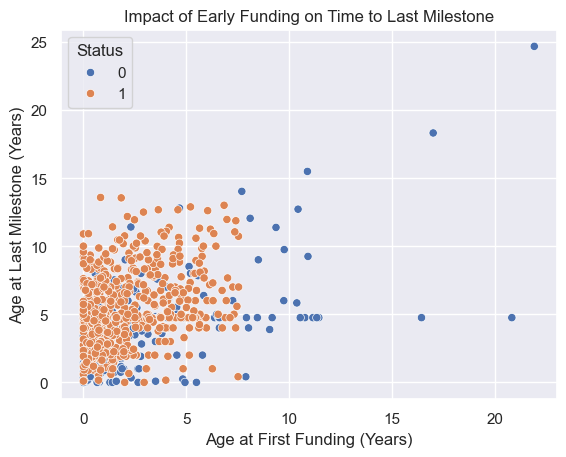

In [36]:
sns.scatterplot(x='age_first_funding_year', y='age_last_milestone_year', hue='status', data=data_df)
plt.title('Impact of Early Funding on Time to Last Milestone')
plt.xlabel('Age at First Funding (Years)')
plt.ylabel('Age at Last Milestone (Years)')
plt.legend(title='Status')
plt.show()

 ##### <span style="color: #77dd77;"> Do startups that receive funding in rounds A, B, or C have a better chance of succeeding than those that rely on angel investors or venture capital?

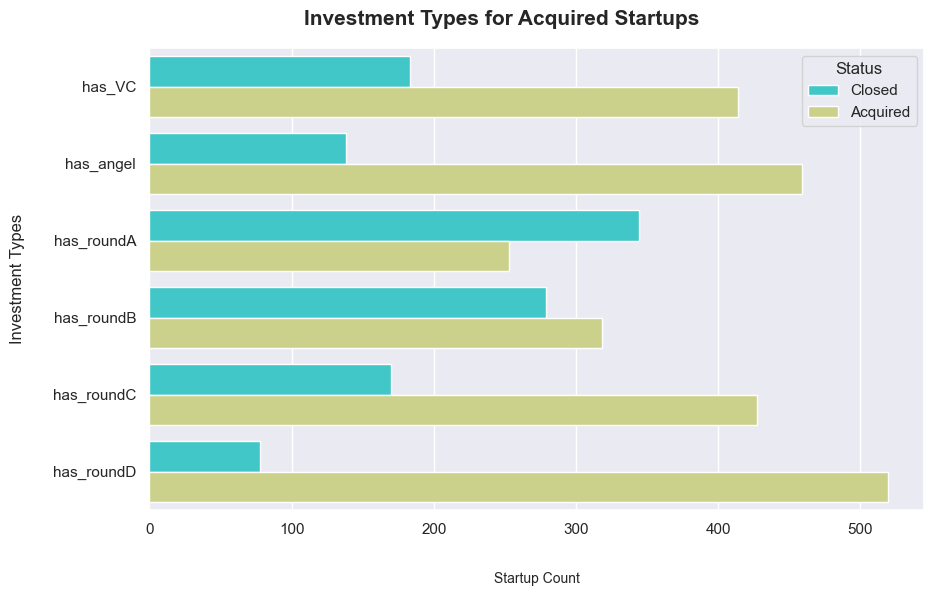

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the DataFrame for entries with a status of 1
d = data_df.loc[data_df['status'] == 1]

# Select only the relevant binary columns
f = d[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]

# Melt the DataFrame to long format for use with countplot
melted_f = pd.melt(f)

# Map the binary values to strings
melted_f['value'] = melted_f['value'].map({1: 'acquired', 0: 'closed'})

# Create the countplot with horizontal bars
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=melted_f, y='variable', hue='value', orient='h', palette="rainbow")

# Update the y-axis label with adjusted position
ax.set_ylabel("Investment Types", labelpad=20)  # Adjust labelpad for position
ax.set_xlabel("Startup Count", fontsize=10, labelpad=25)

# Create the title manually and adjust its position
ax.text(0.2, 1.05, "Investment Types for Acquired Startups", fontsize=15, transform=ax.transAxes, fontweight='bold')  # Adjust the x and y values

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Closed', 'Acquired'], title='Status')

plt.show()

The chart shows that the type of investment can be linked to a startup's chances of being acquired, with later-stage investments being more associated with acquisitions.

 ##### <span style="color: #77dd77;"> Does the number of milestones achieved impact a startup's chance of getting acquired?

In [38]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have your data_df with numerical "milestones" and "status" columns

# Group your data by milestones and status and count the occurrences
grouped = data_df.groupby(["milestones", "status"]).size().reset_index(name="count")
grouped.columns = ["source", "target", "value"]
grouped['target'] = grouped['target'].map({0: 'closed', 1: 'acquired'})
grouped['source'] = grouped.source.map({0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 8: '8'})
links = pd.concat([grouped], axis=0)
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

# Convert links DataFrame to dictionary
links_dict = links.to_dict(orient='list')

# Apply the color map to the links
# Directly use the 'acquired' and 'closed' labels to determine the color
link_colors = ['rgba(144, 238, 144, 0.5)' if target == 'acquired' else 'rgba(255, 0, 0, 0.5)' for target in grouped['target']]


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_source_target,
        color="white"
    ),
    link=dict(
        source=links_dict["source"],
        target=links_dict["target"],
        value=links_dict["value"],
        color=link_colors  # Apply the colors to the links
    )
)])

fig.update_layout(
    annotations=[
        dict(
            x=0.5,  # Set x to 0.5 for centering horizontally
            y=1.20,  # Adjust y as needed 
            text="Analyzing the Correlation: Milestones Achievement vs Startup Status",
            showarrow=False,
            font=dict(
                size=18,
                family="Arial, sans-serif"  # Using a bold font family
            ),
            textangle=0,  
            xref="paper",
            yref="paper"
        ),
        # Add a comma here after the closing brace of the first dictionary
        dict(
            x=-0.10,  # Position to the left of the diagram
            y=0.5,    # Vertically centered
            text="Milestones Achievement",  # Text for the left side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  # Rotate text to be vertical
            xref="paper",
            yref="paper"
        ),
        dict(
            x=1.05,  # Position to the right of the diagram
            y=0.5,   # Vertically centered
            text="Startup Status",  # Text for the right side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  # Rotate text to be vertical
            xref="paper",
            yref="paper"
        )
    ]
)

fig.show()

The data indicates that startups achieving up to four milestones have a significantly higher likelihood of being acquired than those that do not.
-  Specifically, there is a prominent increase in acquisitions for startups reaching two to four milestones, underscoring the importance of early milestone achievement in determining startup success.

 Although the number of acquisitions dips for milestones beyond four, the overall data supports the positive impact of milestone achievements on a startup's prospects for acquisition. This trend reinforces the value of setting and reaching milestones as a strategy for startups aiming to enhance their status and success in the industry.

In [39]:
print(grouped)

   source    target  value
0       0    closed    105
1       0  acquired     47
2       1    closed    102
3       1  acquired    148
4       2    closed     69
5       2  acquired    177
6       3    closed     35
7       3  acquired    147
8       4    closed     12
9       4  acquired     50
10      5    closed      2
11      5  acquired     22
12      6    closed      1
13      6  acquired      5
14      8  acquired      1


 ##### <span style="color: #77dd77;"> What is the average total funding for startups that successfully get acquired VS those that close?

In [40]:
import plotly.express as px

# Define a list of pastel color codes
colors = ['#1f77b4', '#d62728']

# Filter out extreme outliers from the data
max_value = data_df['funding_total_usd'].quantile(0.99)  # Define a threshold (e.g., 99th percentile)
filtered_data = data_df[data_df['funding_total_usd'] < max_value]

# Create a histogram with the filtered data
fig = px.histogram(data_frame=filtered_data, x='funding_total_usd', color='status',
                   labels={'funding_total_usd': 'Total Funding (USD in Millions)'},
                   color_discrete_sequence=colors)  
                   
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Total Funding (Excluding Outliers): Acquired vs Closed Startups',
        'y': 0.95,  # You can adjust this for vertical position
        'x': 0.5,  # You can adjust this for horizontal position
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 17,
            'color': 'black',  # You can change the color if you want
            'family': 'Arial, sans-serif', # You can change the font family if you want
        },
    },
    xaxis_title='Total Funding (USD in Millions)',
    yaxis_title='Frequency',
)
# Format the x-axis tick labels to display values in millions
fig.update_xaxes(tickformat=".2s", exponentformat="none")

# Show the figure
fig.show()


/Users/gabrielaarzate/.virtualenvs/startup/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Most startups, whether acquired or closed, tend to have lower levels of total funding, with the likelihood of either acquisition or closure diminishing as funding amounts increase. 

This might imply that while sufficient funding is necessary for a startup's success, it is not the only determining factor, and there is a threshold beyond which more funding does not necessarily equate to greater chances of success.

##### <span style="color: #add8e6;"> Final

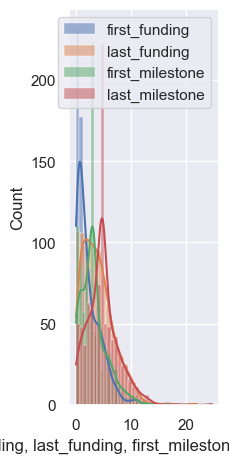

In [41]:
# Second subplot for distribution plots
plt.subplot(1, 3, 2)
sns.histplot(data_df["age_first_funding_year"], kde=True, label="first_funding")
sns.histplot(data_df["age_last_funding_year"], kde=True, label="last_funding")
sns.histplot(data_df["age_first_milestone_year"], kde=True, label="first_milestone")
sns.histplot(data_df["age_last_milestone_year"], kde=True, label="last_milestone")
plt.xlabel("first_funding, last_funding, first_milestone, last_milestone")
plt.legend()

plt.tight_layout()
plt.show()